In [60]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler, PowerTransformer
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from scipy.stats import mode
from tensorflow.keras.callbacks import EarlyStopping
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from keras.regularizers import l2
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt
import seaborn as sns

In [147]:
df_cs = pd.read_csv ('Data from template 3.csv')
df_cs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 8 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Cement (kg/m^{3} )            99 non-null     float64
 1   Fly ash (kg/m^{3} )           99 non-null     float64
 2   Water (kg/m^{3} )             99 non-null     float64
 3   Superplasticizer (kg/m^{3} )  99 non-null     float64
 4   Coarse aggregate (kg/m^{3} )  99 non-null     float64
 5   Fine aggregate (kg/m^{3} )    99 non-null     float64
 6   Age (Days)                    99 non-null     int64  
 7   Strength (MPa)                99 non-null     float64
dtypes: float64(7), int64(1)
memory usage: 6.3 KB


In [124]:
df_cs

,Cement (kg/m^{3} ),Fly ash (kg/m^{3} ),Water (kg/m^{3} ),Superplasticizer (kg/m^{3} ),Coarse aggregate (kg/m^{3} ),Fine aggregate (kg/m^{3} ),Age (Days),Strength (MPa)
0,185.7,101.5,166.9,7.5,1006.4,905.4,90,38.28
1,170.7,127.4,161.8,7.8,1090.0,798.5,3,17.11
2,180.7,127.4,166.1,7.8,1090.0,798.6,14,23.34
3,160.7,127.4,162.1,7.8,1090.0,804.0,28,27.41
4,242.1,125.6,184.3,5.7,1057.6,779.3,14,21.91
...,...,...,...,...,...,...,...,...
94,318.9,124.8,212.7,5.7,860.5,725.0,28,36.09
95,355.9,124.5,196.3,11.0,801.4,769.0,28,36.27
96,199.8,124.8,185.4,12.6,849.3,856.5,28,18.01
97,278.7,124.8,170.3,10.1,925.3,782.0,28,41.16


In [126]:
df_cs.describe()

,Cement (kg/m^{3} ),Fly ash (kg/m^{3} ),Water (kg/m^{3} ),Superplasticizer (kg/m^{3} ),Coarse aggregate (kg/m^{3} ),Fine aggregate (kg/m^{3} ),Age (Days),Strength (MPa)
count,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000
mean,241.739394,123.887879,178.605051,6.357576,1001.460606,794.427273,33.727273,30.658687
std,55.690326,10.177509,18.108152,4.925570,71.750947,45.987624,28.954157,12.984464
min,136.100000,92.100000,141.100000,0.000000,801.000000,687.000000,3.000000,9.490000
25%,197.550000,124.600000,162.950000,0.000000,959.050000,764.250000,14.000000,20.115000
50%,230.600000,124.800000,184.200000,7.000000,1006.400000,794.900000,28.000000,27.540000
75%,290.100000,124.800000,191.600000,10.500000,1055.600000,810.700000,28.000000,40.090000
max,376.000000,168.300000,220.500000,18.000000,1118.000000,905.400000,90.000000,72.110000


In [127]:
def des_stat(df): 

    # Compute descriptive statistics
    descriptive_stats = {
        'Mean': df.mean(),
        'Standard Error': df.sem(),
        'Median': df.median(),
        'Mode': df.mode().iloc[0],  # Use iloc[0] to get the mode(s) as a Series
        'Standard Deviation': df.std(),
        'Sample Variance': df.var(),
        'Skewness': df.skew(),
        'Range': df.max() - df.min(),
        'Minimum': df.min(),
        'Maximum': df.max(),
        'Sum': df.sum(),
        'Count': df.count()
    }

    # Create a DataFrame from the computed statistics
    descriptive_df = pd.DataFrame(descriptive_stats)

    # Display the descriptive DataFrame
    return descriptive_df.transpose()


In [128]:
des_stat(df_cs)

,Cement (kg/m^{3} ),Fly ash (kg/m^{3} ),Water (kg/m^{3} ),Superplasticizer (kg/m^{3} ),Coarse aggregate (kg/m^{3} ),Fine aggregate (kg/m^{3} ),Age (Days),Strength (MPa)
Mean,241.739394,123.887879,178.605051,6.357576,1001.460606,794.427273,33.727273,30.658687
Standard Error,5.597088,1.022878,1.819938,0.495038,7.211241,4.621930,2.910002,1.304988
Median,230.600000,124.800000,184.200000,7.000000,1006.400000,794.900000,28.000000,27.540000
Mode,213.500000,124.800000,169.600000,0.000000,968.000000,800.000000,28.000000,17.110000
Standard Deviation,55.690326,10.177509,18.108152,4.925570,71.750947,45.987624,28.954157,12.984464
Sample Variance,3101.412412,103.581688,327.905178,24.261243,5148.198330,2114.861596,838.343228,168.596312
Skewness,0.247181,0.533738,-0.052308,0.002947,-0.774999,0.429418,1.050912,0.658000
Range,239.900000,76.200000,79.400000,18.000000,317.000000,218.400000,87.000000,62.620000
Minimum,136.100000,92.100000,141.100000,0.000000,801.000000,687.000000,3.000000,9.490000
Maximum,376.000000,168.300000,220.500000,18.000000,1118.000000,905.400000,90.000000,72.110000


In [129]:
def plot_relative_freq_dist(df, bins):

    # Get the list of all column names (features) in the DataFrame
    features = df.select_dtypes(include=['int', 'float']).columns  # Select only numeric features

    # Calculate number of subplots needed (3x3 grid)
    num_features = len(features)
    num_rows = 3
    num_cols = 3
    num_subplots = num_features

    # Create a new figure and subplots with specified size
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 12))

    # Flatten the axes array for easier iteration
    axes = axes.flatten()

    # Iterate over each feature and create a histplot for numeric features
    for i, feature in enumerate(features):
        if i < num_subplots:  # Only plot up to the available subplots
            # Create histplot on specified subplot with skyblue color
            sns.histplot(df[feature], bins=bins, kde=True, ax=axes[i], color='pink')
            axes[i].set_xlabel(feature)  # Set x-axis label
            axes[i].set_ylabel('Relative frequency distribution')  # Set y-axis label
            
    fig.suptitle(f'Histogram showing the maximum concentration used in evaluating the compressive strength')
    # Adjust layout and spacing between subplots
    plt.tight_layout()


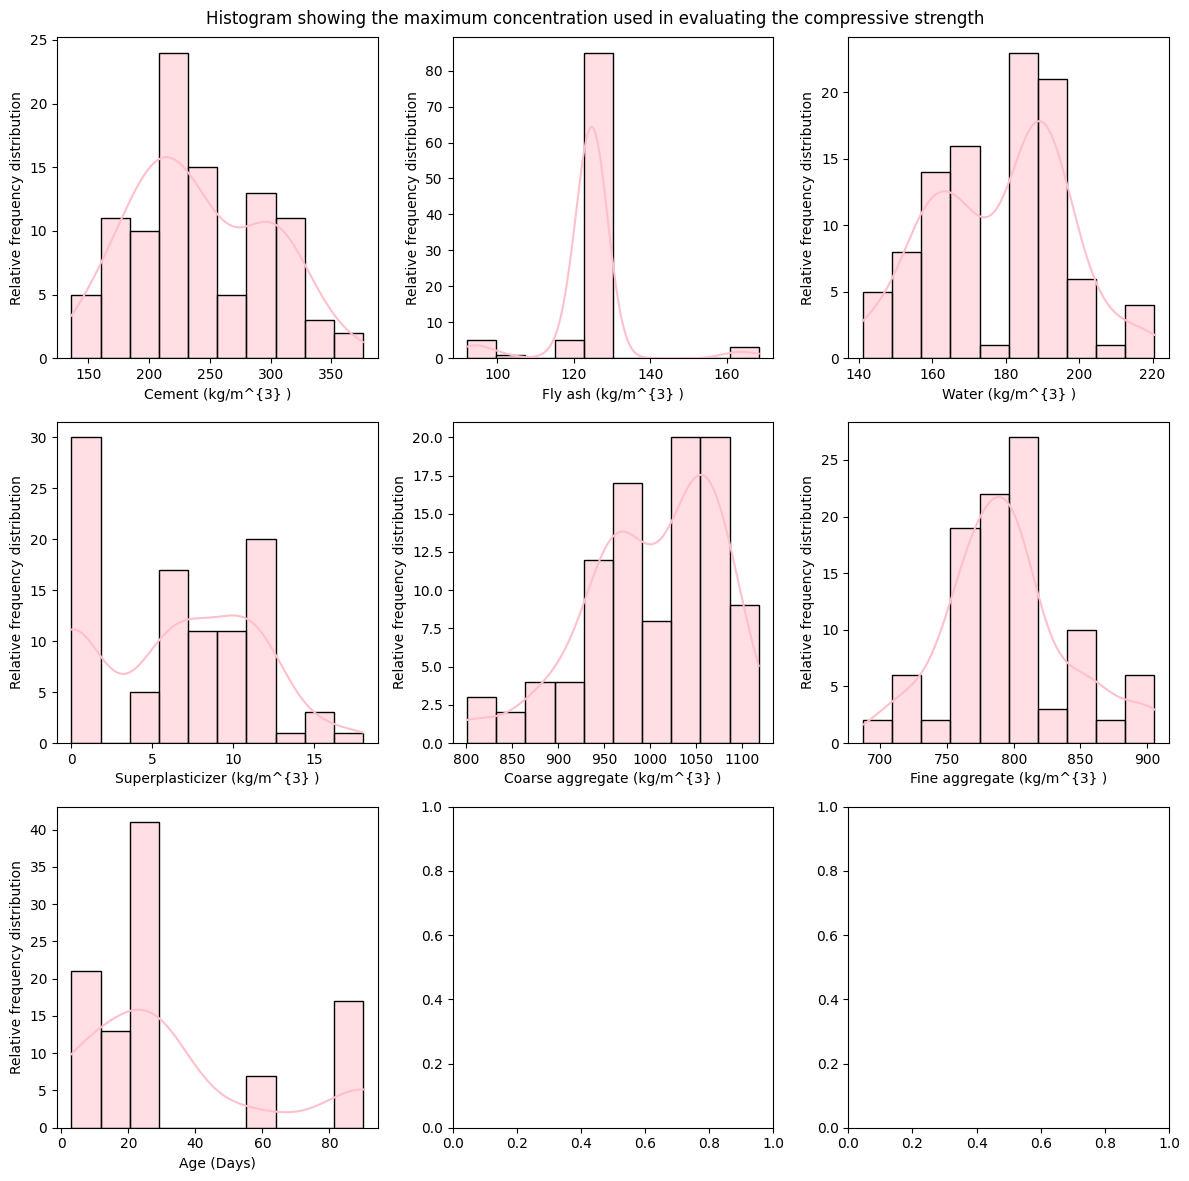

In [130]:
plot_relative_freq_dist(df_cs.iloc[:,:-1], 10)
plt.show()

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

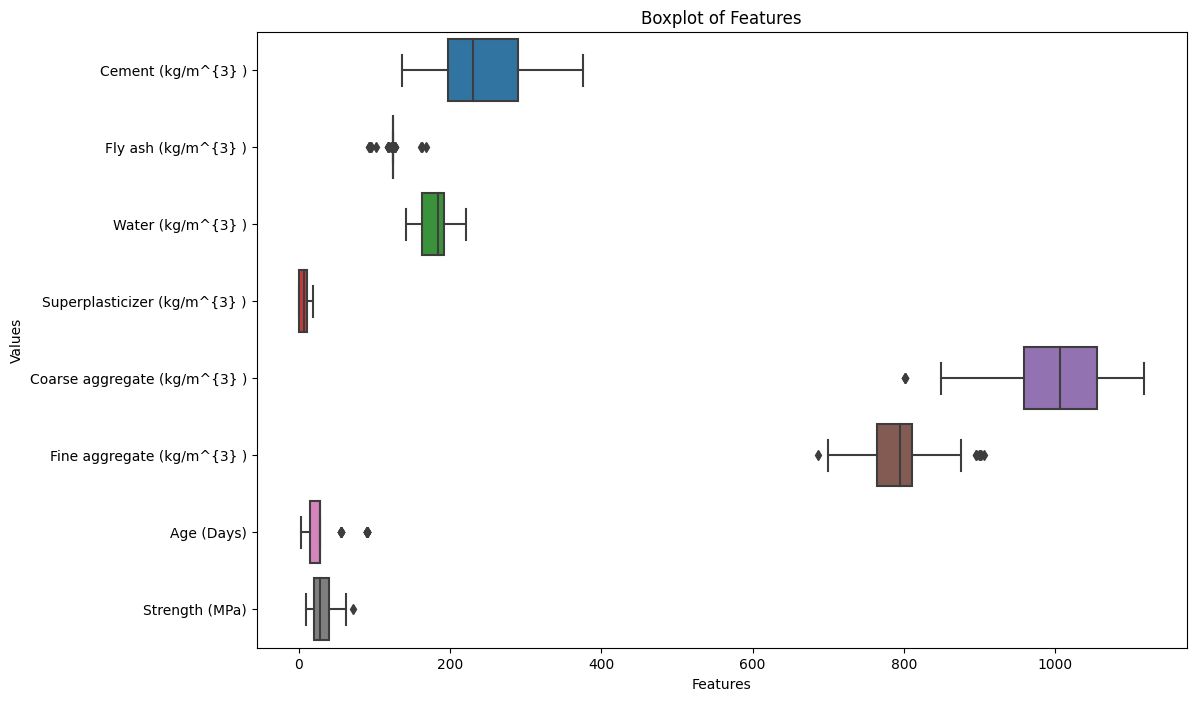

In [131]:
# Create a boxplot for each feature
plt.figure(figsize=(12, 8))
sns.boxplot(data=df_cs, orient='h')  # 'v' for vertical boxplots

# Set plot labels and title
plt.title('Boxplot of Features')
plt.xlabel('Features')
plt.ylabel('Values')

# Show the plot
plt.show()


In [132]:
# Outlier detection - Inter quartile range

def IQR(df, x):
    _25th = df[x].quantile(0.25)
    _75th = df[x].quantile(0.75)

    iqr = _75th - _25th

    upper_limit = _75th + 1.5 * iqr
    lower_limit = _25th - 1.5 * iqr

    print("Upper limit:", upper_limit)
    print("Lower limit:", lower_limit)

    # Identify outliers using boolean mask
    outliers = df[(df[x] > upper_limit) | (df[x] < lower_limit)]

    # Print only the values of the specified column that are outliers
    print("Outliers in column '{}':".format(x))
    print(f"Total: {len(outliers[x])}")
    print(outliers[x])

In [149]:
df_cs.columns

Index(['Cement (kg/m^{3} )', 'Fly ash (kg/m^{3} )', 'Water (kg/m^{3} )',
       'Superplasticizer (kg/m^{3} )', 'Coarse aggregate (kg/m^{3} )',
       'Fine aggregate (kg/m^{3} )', 'Age (Days)', 'Strength (MPa)'],
      dtype='object')

In [148]:
IQR(df_cs, 'Fly ash (kg/m^{3} )')

Upper limit: 125.1
Lower limit: 124.29999999999998
Outliers in column 'Fly ash (kg/m^{3} )':
Total: 26
0     101.5
1     127.4
2     127.4
3     127.4
4     125.6
5     125.6
7     118.3
8     124.2
9     124.2
10    168.3
11    163.3
12    161.3
13    118.2
14    119.2
15    118.2
16     94.1
17     92.1
18     92.1
19     95.7
20     95.7
23    124.2
24    122.8
25    122.8
26    122.8
27    122.8
29    121.8
Name: Fly ash (kg/m^{3} ), dtype: float64


In [134]:
# Capping Fly Ash

upper_limit = 125.1
lower_limit = 124.29999999999998
df_cs_cap = df_cs.copy()

df_cs_cap['Fly ash (kg/m^{3} )'] = np.where(
    df_cs_cap['Fly ash (kg/m^{3} )'] > upper_limit,
    upper_limit,
    np.where(
        df_cs_cap['Fly ash (kg/m^{3} )'] < lower_limit,
        lower_limit,
        df_cs_cap['Fly ash (kg/m^{3} )']
    )
)

In [151]:
IQR(df_cs_cap, 'Age (Days)')

Upper limit: 49.0
Lower limit: -7.0
Outliers in column 'Age (Days)':
Total: 24
0     90
6     56
7     90
15    90
18    90
23    56
24    90
28    56
29    90
30    90
33    56
34    90
36    56
37    90
41    56
42    90
43    56
44    90
58    90
59    90
61    90
63    90
68    90
75    90
Name: Age (Days), dtype: int64


In [152]:
# Capping Age

upper_limit = 49.0
lower_limit = -7.0
#df_cs_cap = df_cs.copy()

df_cs_cap['Age (Days)'] = np.where(
    df_cs_cap['Age (Days)'] > upper_limit,
    upper_limit,
    np.where(
        df_cs_cap['Age (Days)'] < lower_limit,
        lower_limit,
        df_cs_cap['Age (Days)']
    )
)

In [155]:
IQR(df_cs_cap, 'Age (Days)')

Upper limit: 49.0
Lower limit: -7.0
Outliers in column 'Age (Days)':
Total: 0
Series([], Name: Age (Days), dtype: float64)


In [156]:
X = df_cs_cap.iloc[:, :-1]  
y = df_cs_cap.iloc[:, -1]   

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [112]:
# Applying Box-Cox Transform

pt = PowerTransformer(method='box-cox')

X_train_transformed = pt.fit_transform(X_train+0.000001)
X_test_transformed = pt.transform(X_test+0.000001)

Decision Tree (DT)

In [157]:
from sklearn.tree import DecisionTreeRegressor
model_dt = DecisionTreeRegressor(max_depth=7, min_samples_split=3, min_samples_leaf=1, random_state=0)

cv_scores = cross_val_score(model_dt, X_train, y_train, cv=10, scoring='r2')

print("Cross-Validation Scores:")
print(cv_scores)
print(f"Mean R2 Score: {np.mean(cv_scores):.4f} (±{np.std(cv_scores):.4f})")

model_dt.fit(X_train, y_train)
y_pred = model_dt.predict(X_test)
test_r2 = r2_score(y_test, y_pred)
print(f"R2 Score on Test Set: {test_r2:.4f}")

Cross-Validation Scores:
[ 0.62204156  0.18483906  0.45653964  0.62164304  0.43216718 -1.68568721
 -0.66805416 -0.47775595  0.56042816 -0.31248977]
Mean R2 Score: -0.0266 (±0.7158)
R2 Score on Test Set: 0.5270


In [158]:
from sklearn.tree import DecisionTreeRegressor

model_dt = DecisionTreeRegressor(random_state=42)

param_grid = {
    'max_depth': [5, 6, 7, 9, 11, 13, 15, 17],
    'min_samples_split': [2, 4, 6, 8, 9, 10, 12, 13, 14, 15],
    'min_samples_leaf': [2, 3, 4, 5, 6, 7]
}

grid_search = GridSearchCV(model_dt, param_grid, cv=10, scoring='r2')
grid_search.fit(X_train, y_train)

print(f"Best Hyperparameters from GridSearchCV: {grid_search.best_params_}")


Best Hyperparameters from GridSearchCV: {'max_depth': 9, 'min_samples_leaf': 2, 'min_samples_split': 8}


In [161]:
best_params_DTC = grid_search.best_params_

best_model_dt = DecisionTreeRegressor(**best_params_DTC, random_state=42)
best_model_dt.fit(X_train, y_train)


yhat_dt = best_model_dt.predict(X_test)
MSE_dt = mean_squared_error(y_test, yhat_dt)
print(f"MSE from DT: {MSE_dt:.2f}")
MAE_dt = mean_absolute_error(y_test, yhat_dt)
print(f"MAE from DT: {MAE_dt:.2f}")
r2_dt = r2_score(y_test, yhat_dt)
print(f"R2 score: {r2_dt: .2f}")
rmse_dt = np.sqrt(MSE_dt)
print(f"Root Mean Squared Error (RMSE) from DT:{rmse_dt}")

MSE from DT: 72.17
MAE from DT: 6.04
R2 score:  0.60
Root Mean Squared Error (RMSE) from DT:8.49535946305173


In [24]:
df_cs.columns

Index(['Cement (kg/m^{3} )', 'Fly ash (kg/m^{3} )', 'Water (kg/m^{3} )',
       'Superplasticizer (kg/m^{3} )', 'Coarse aggregate (kg/m^{3} )',
       'Fine aggregate (kg/m^{3} )', 'Age (Days)', 'Strength (MPa)'],
      dtype='object')

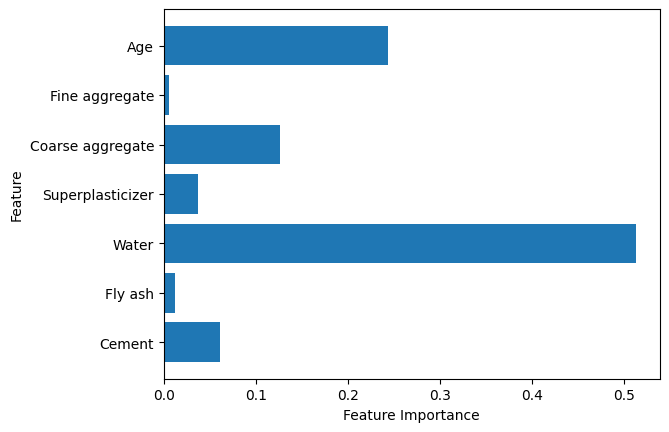

In [162]:
def plot_feature_importances_custom(model, feature_names):
    n_features = len(feature_names)
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), feature_names)
    plt.xlabel("Feature Importance")
    plt.ylabel("Feature")

custom_feature_names = ["Cement", "Fly ash", "Water","Superplasticizer", "Coarse aggregate", "Fine aggregate", "Age"]
plot_feature_importances_custom(best_model_dt, custom_feature_names)

K-fold - DT

In [163]:
from sklearn.model_selection import KFold


X = X.values
y = y.values

# Define the number of folds for cross-validation
k = 10

# Initialize a Decision Tree Regressor (or any other model)
model = best_model_dt  # Example Decision Tree model

# Initialize KFold cross-validator
kf = KFold(n_splits=k, shuffle=True, random_state=42)

# Lists to store evaluation metrics (e.g., MSE) for each fold
mse_scores = []
r2_scores = []

# Perform k-fold cross-validation
for train_index, val_index in kf.split(X):
    # Split data into training and validation sets for this fold
    X_train, X_val = X[train_index], X[val_index]
    y_train, y_val = y[train_index], y[val_index]
    
    # Train the model on the training data for this fold
    model.fit(X_train, y_train)
    
    # Evaluate the model on the validation data for this fold
    y_val_pred = model.predict(X_val)
    
    # Calculate mean squared error (MSE) for the validation predictions
    fold_mse = mean_squared_error(y_val, y_val_pred)
    fold_r2 = r2_score(y_val, y_val_pred)
    
    # Append the MSE score to the list of scores
    mse_scores.append(fold_mse)
    r2_scores.append(fold_r2)

# Calculate and print the average MSE across all folds
avg_mse = np.mean(mse_scores)
avg_r2 = np.mean(r2_scores)
print(f"Average MSE across {k}-fold cross-validation: {avg_mse:.2f}")
print(avg_r2)


Average MSE across 10-fold cross-validation: 96.06
0.22962055959689037


In [164]:
for each in r2_scores:
    print(each)

0.2585038282469687
0.5136182995174845
0.7302981255919561
0.6287530562310641
0.7010736420221996
0.19056498215211137
0.021043641540828495
-0.9016466256978419
0.5265299745242765
-0.37253332816014373


In [144]:
yhat_final = best_model_dt.predict(X_test)
yhat_final

c:\Users\tfahi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(


array([42.238     , 42.965     , 36.13142857, 48.33333333, 42.238     ,
        9.57      , 18.72714286, 45.84714286, 14.445     , 39.0075    ,
       18.72714286, 28.218     , 25.99833333, 26.09666667, 42.965     ,
       26.09666667, 26.09666667, 25.99833333,  9.57      , 26.09666667])

In [145]:
y_test

62    46.29
40    42.44
95    36.27
18    47.83
97    41.16
84     9.59
64    17.11
42    58.40
10    11.78
0     38.28
31    22.11
76    26.11
47    26.11
26    22.93
44    45.25
4     21.91
22    30.92
12    25.20
88     9.55
73    24.11
Name: Strength (MPa), dtype: float64